# Art DATIS: Data Analysis

In [1]:
# 1. load OCRed texts
import glob
txts_path = '../artdatis/tagging/OCRed/typed/'
# filter out and collect text files into a corpus of documents
text_corpus = []
for file_path in glob.glob(txts_path+'*_text.txt'):
    with open(file_path) as file:
        text = file.read()
        # filter duplicates
        if text not in text_corpus:
            text_corpus.append(text)
print("Loaded %d documents"%len(text_corpus))

Loaded 8154 documents


In [2]:
# 2. pre-processing: remove stopwords, split into words
import urllib.request
from pprint import pprint

def load_word_list(lang='en'):
    url = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-%s/master/stopwords-%s.txt' % (lang, lang)
    stopwords = urllib.request.urlopen(url).read().decode('UTF-8').split()
    print("Loaded %s stopwords, e.g. %s" % (lang, ", ".join(stopwords[:2])))
    return set(stopwords)


# load stopwords
en_stoplist = load_word_list('en')
de_stoplist = load_word_list('de')
nl_stoplist = load_word_list('nl')
fr_stoplist = load_word_list('fr')

stoplist = en_stoplist | de_stoplist | nl_stoplist | fr_stoplist

# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

Loaded en stopwords, e.g. 'll, 'tis
Loaded de stopwords, e.g. a, ab
Loaded nl stopwords, e.g. aan, aangaande
Loaded fr stopwords, e.g. a, abord


In [4]:
# Count word frequencies
word_list = [word for text in texts for word in text if word.isalpha()]

from collections import Counter
Counter(word_list).most_common()

[('glass', 3411),
 ('glas', 3282),
 ('museum', 2202),
 ('heer', 2032),
 ('jaar', 2016),
 ('kunst', 1964),
 ('werk', 1845),
 ('nieuwe', 1762),
 ('grote', 1721),
 ('vormgeving', 1683),
 ('art', 1672),
 ('amsterdam', 1610),
 ('aantal', 1535),
 ('oe', 1283),
 ('uur', 1275),
 ('zeer', 1259),
 ('ter', 1139),
 ('crafts', 1132),
 ('goed', 1097),
 ('tijd', 1086),
 ('school', 1073),
 ('leerdam', 1067),
 ('mogelijk', 1004),
 ('beeldende', 995),
 ('di', 987),
 ('valkema', 977),
 ('vorm', 961),
 ('plaats', 950),
 ('enkele', 887),
 ('eee', 868),
 ('gaat', 859),
 ('waarin', 846),
 ('kunstenaars', 834),
 ('jaren', 821),
 ('council', 819),
 ('juni', 818),
 ('werken', 806),
 ('dagen', 798),
 ('bestuur', 796),
 ('april', 793),
 ('gaan', 791),
 ('september', 789),
 ('rietveld', 787),
 ('groot', 785),
 ('academie', 782),
 ('design', 770),
 ('ontwerpen', 767),
 ('oo', 762),
 ('staat', 755),
 ('komt', 745),
 ('leden', 733),
 ('lessen', 732),
 ('komen', 729),
 ('copier', 728),
 ('nederlandse', 728),
 ('vereni

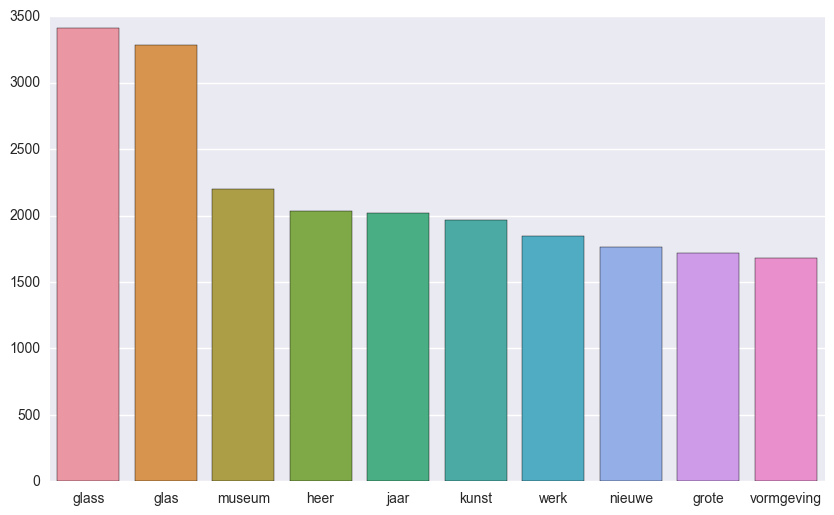

In [9]:
# Visualise counter
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

%matplotlib inline


labels, counts = [], []
for label, count in Counter(word_list).most_common(10):
    labels.append(label)
    counts.append(count)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=labels, y=counts)

In [20]:
# Count n-gram frequencies based on https://stackoverflow.com/questions/12488722/counting-bigrams-pair-of-two-words-in-a-file-using-python

from itertools import tee, islice

def ngrams(lst, n):
  tlst = lst
  while True:
    a, b = tee(tlst)
    l = tuple(islice(a, n))
    if len(l) == n:
      yield l
      next(b)
      tlst = b
    else:
      break

Counter(ngrams(word_list, 2)).most_common()

[(('gerrit', 'rietveld'), 416),
 (('rietveld', 'academie'), 403),
 (('crafts', 'council'), 400),
 (('sybren', 'valkema'), 382),
 (('beeldende', 'kunst'), 328),
 (('corning', 'museum'), 290),
 (('museum', 'glass'), 227),
 (('grafische', 'vormgeving'), 217),
 (('tentamen', 'afgesloten'), 195),
 (('glass', 'review'), 182),
 (('prinses', 'irenestraat'), 181),
 (('dagen', 'dagen'), 157),
 (('irenestraat', 'amsterdam'), 152),
 (('stedelijk', 'museum'), 151),
 (('nader', 'genoemde'), 150),
 (('genoemde', 'theoriegebieden'), 147),
 (('theoriegebieden', 'tentamen'), 141),
 (('maandag', 'dinsdag'), 139),
 (('grafisch', 'ontwerpen'), 136),
 (('academie', 'prinses'), 134),
 (('donderdag', 'vrijdag'), 131),
 (('harvey', 'littleton'), 129),
 (('werkgroep', 'glas'), 126),
 (('beeldende', 'kunsten'), 125),
 (('opsomming', 'werkstukken'), 125),
 (('dinsdag', 'woensdag'), 123),
 (('industriéle', 'vormgeving'), 122),
 (('museum', 'beuningen'), 121),
 (('nederlandsche', 'glasfabriek'), 120),
 (('aantal', 

In [21]:
Counter(ngrams(word_list, 3)).most_common()

[(('gerrit', 'rietveld', 'academie'), 267),
 (('corning', 'museum', 'glass'), 219),
 (('nader', 'genoemde', 'theoriegebieden'), 147),
 (('prinses', 'irenestraat', 'amsterdam'), 144),
 (('genoemde', 'theoriegebieden', 'tentamen'), 141),
 (('theoriegebieden', 'tentamen', 'afgesloten'), 140),
 (('academie', 'prinses', 'irenestraat'), 120),
 (('rietveld', 'academie', 'prinses'), 116),
 (('beeldende', 'kunst', 'vormgeving'), 92),
 (('vormgeving', 'metalen', 'kunststoffen'), 83),
 (('vereniging', 'vrienden', 'modern'), 80),
 (('verschuldigd', 'storten', 'postrekening'), 79),
 (('centrale', 'raad', 'beroep'), 74),
 (('maandag', 'dinsdag', 'woensdag'), 70),
 (('donderdag', 'vrijdag', 'zaterdag'), 62),
 (('royal', 'college', 'art'), 62),
 (('wedde', 'standplaats', 'klasse'), 59),
 (('museum', 'beuningen', 'rotterdam'), 55),
 (('sybren', 'valkema', 'wilhelminalaan'), 53),
 (('stedelijk', 'museum', 'amsterdam'), 52),
 (('beantwoording', 'nummer', 'onderwerp'), 51),
 (('tentamen', 'afgesloten', 'k

In [22]:
Counter(ngrams(word_list, 4)).most_common()

[(('nader', 'genoemde', 'theoriegebieden', 'tentamen'), 141),
 (('genoemde', 'theoriegebieden', 'tentamen', 'afgesloten'), 140),
 (('gerrit', 'rietveld', 'academie', 'prinses'), 110),
 (('rietveld', 'academie', 'prinses', 'irenestraat'), 107),
 (('academie', 'prinses', 'irenestraat', 'amsterdam'), 103),
 (('theoriegebieden', 'tentamen', 'afgesloten', 'kandidaat'), 49),
 (('vereniging', 'vrienden', 'modern', 'glas'), 48),
 (('afschrift', 'beslissing', 'ter', 'post'), 47),
 (('maand', 'afschrift', 'beslissing', 'ter'), 46),
 (('centrale', 'raad', 'beroep', 'instellen'), 44),
 (('raad', 'beroep', 'instellen', 'beroep'), 44),
 (('beantwoording', 'nummer', 'onderwerp', 'vermelden'), 43),
 (('orgaan', 'deelt', 'besluit', 'terstond'), 43),
 (('deelt', 'besluit', 'terstond', 'mede'), 43),
 (('beroep', 'gekomen', 'centrale', 'raad'), 43),
 (('gekomen', 'centrale', 'raad', 'beroep'), 43),
 (('verandering', 'brengt', 'orgaan', 'deelt'), 42),
 (('brengt', 'orgaan', 'deelt', 'besluit'), 42),
 (('st

In [23]:
Counter(ngrams(word_list, 5)).most_common()

[(('nader', 'genoemde', 'theoriegebieden', 'tentamen', 'afgesloten'), 140),
 (('gerrit', 'rietveld', 'academie', 'prinses', 'irenestraat'), 102),
 (('rietveld', 'academie', 'prinses', 'irenestraat', 'amsterdam'), 92),
 (('genoemde', 'theoriegebieden', 'tentamen', 'afgesloten', 'kandidaat'), 49),
 (('maand', 'afschrift', 'beslissing', 'ter', 'post'), 46),
 (('orgaan', 'deelt', 'besluit', 'terstond', 'mede'), 43),
 (('beroep', 'gekomen', 'centrale', 'raad', 'beroep'), 43),
 (('verandering', 'brengt', 'orgaan', 'deelt', 'besluit'), 42),
 (('brengt', 'orgaan', 'deelt', 'besluit', 'terstond'), 42),
 (('gekomen', 'centrale', 'raad', 'beroep', 'instellen'), 42),
 (('centrale', 'raad', 'beroep', 'instellen', 'beroep'), 42),
 (('beslissing', 'pensioenraad', 'bezwaarschrift', 'maand', 'afschrift'), 40),
 (('pensioenraad', 'bezwaarschrift', 'maand', 'afschrift', 'beslissing'), 40),
 (('bezwaarschrift', 'maand', 'afschrift', 'beslissing', 'ter'), 40),
 (('indiening', 'verschuldigd', 'storten', 'po

In [24]:
Counter(ngrams(word_list, 6)).most_common()

[(('gerrit', 'rietveld', 'academie', 'prinses', 'irenestraat', 'amsterdam'),
  88),
 (('nader',
   'genoemde',
   'theoriegebieden',
   'tentamen',
   'afgesloten',
   'kandidaat'),
  49),
 (('verandering', 'brengt', 'orgaan', 'deelt', 'besluit', 'terstond'), 42),
 (('brengt', 'orgaan', 'deelt', 'besluit', 'terstond', 'mede'), 42),
 (('beroep', 'gekomen', 'centrale', 'raad', 'beroep', 'instellen'), 42),
 (('beslissing',
   'pensioenraad',
   'bezwaarschrift',
   'maand',
   'afschrift',
   'beslissing'),
  40),
 (('pensioenraad',
   'bezwaarschrift',
   'maand',
   'afschrift',
   'beslissing',
   'ter'),
  40),
 (('bezwaarschrift', 'maand', 'afschrift', 'beslissing', 'ter', 'post'), 40),
 (('gekomen', 'centrale', 'raad', 'beroep', 'instellen', 'beroep'), 40),
 (('bezwaarschrift',
   'indiening',
   'verschuldigd',
   'storten',
   'postrekening',
   'algemeen'),
  38),
 (('centrale', 'raad', 'beroep', 'instellen', 'beroep', 'verschuldigd'), 38),
 (('raad', 'beroep', 'instellen', 'bero